In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


2025-02-28 17:41:02.292830: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load dataset
file_path = 'sorted_stock_data_cleaned_nica.csv'
data = pd.read_csv(file_path)

In [3]:
Test_close=data['Close']

In [4]:
Test_close

0       660.0
1       651.0
2       646.0
3       648.0
4       648.0
        ...  
1915    363.0
1916    370.7
1917    382.0
1918    377.0
1919    374.5
Name: Close, Length: 1920, dtype: float64

In [5]:
# Ensure the dataset has the required 8 features
assert len(data.columns) == 9, "Dataset should have exactly 8 features!"

In [6]:
# Normalize the dataset
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [7]:
# Convert data into sequences
def create_sequences(data, seq_length=50):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 50  # Lookback period
X_train, y_train = create_sequences(data_scaled, seq_length)

In [8]:
y_train.shape, X_train.shape

((1870, 9), (1870, 50, 9))

In [9]:
# stock="sorted_stock_data_cleaned_nica.csv"

In [10]:
# data=pd.read_csv(stock)

In [11]:
# data

In [12]:
# data_test=data['Close']

In [13]:
# data_test

In [14]:
# import pandas as pd

# # Read CSV file
# df = pd.read_csv("NICA_Final_EPS_PE.csv")




In [15]:
# # Scaling Data
# scaler = MinMaxScaler(feature_range=(0,1))
# # data_train_scaled = scaler.fit_transform(np.array(data_train).reshape(-1,1))
# # data_test_scaled = scaler.fit_transform(np.array(data_test).reshape(-1,1))

In [16]:
# data_test_scaled.shape

In [17]:
# x_test, y_test = [], []
# for i in range(100, len(data_test_scaled)):
#     x_test.append(data_test_scaled[i-100:i])
#     y_test.append(data_test_scaled[i, 0])
# x_test, y_test = np.array(x_test), np.array(y_test)

In [18]:
# print(f"Shape of train={x_test.shape}\nShape of data_test={y_test.shape}")

In [19]:
from tensorflow.keras.models import load_model

# Load the saved Keras model
model = load_model('lstm50.keras')

# Now you can use the model to make predictions, evaluate, etc.


In [20]:
# # Evaluate the model
# from sklearn.metrics import mean_squared_error
# y_pred = model.predict(X_train)
# mse = mean_squared_error(y_train, y_pred)
# print(f"Test Mean Squared Error: {mse}")

In [21]:
# Make Predictions
y_pred_scaled = model.predict(X_train)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_train.reshape(-9,9))

59/59 [==============================] - 2s 24ms/step


In [22]:
y_pred.shape, y_test_actual.shape

((1870, 9), (1870, 9))

In [23]:
# y_pred[0][3]

In [24]:
# Assuming 'Close' is the 0th feature and 'PE Ratio' is the 5th feature in the dataset
# Extract the actual test values
X_test_close = y_test_actual[:, 3]  # Actual Close values from test data
X_test_pe = y_test_actual[:, 8]  # Actual PE Ratio values from test data
y_pred_close=y_pred[:,3]
y_pred_pe=y_pred[:,8]


In [25]:
X_test_close.shape, y_pred_close.shape

((1870,), (1870,))

In [26]:
X_test_close

array([508. , 508. , 503. , ..., 382. , 377. , 374.5])

In [27]:
y_pred_close.shape

(1870,)

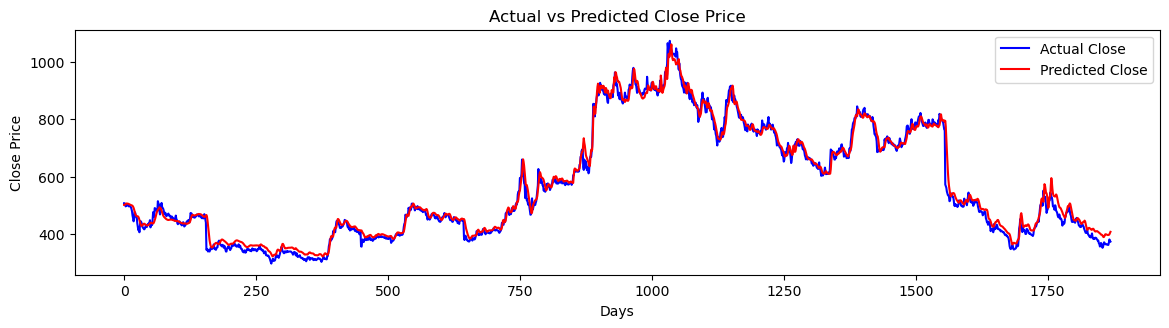

In [28]:
# Plot actual vs predicted values for Close and PE Ratio
plt.figure(figsize=(14, 7))

# Plot Close
plt.subplot(2, 1, 1)
plt.plot(X_test_close, label="Actual Close", color="blue")
plt.plot(y_pred_close, label="Predicted Close", color="red")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted Close Price")
plt.legend()


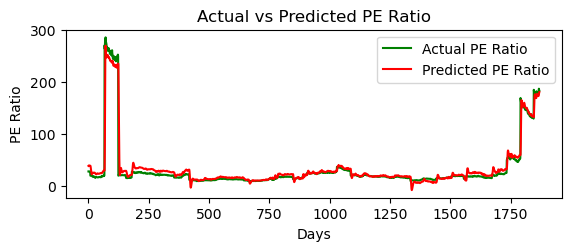

In [29]:
# Plot PE Ratio
plt.subplot(2, 1, 2)
plt.plot(X_test_pe, label="Actual PE Ratio", color="green")
plt.plot(y_pred_pe, label="Predicted PE Ratio",  color="red")
plt.xlabel("Days")
plt.ylabel("PE Ratio")
plt.title("Actual vs Predicted PE Ratio")
plt.legend()

In [30]:
# #for acutal
# for i in range(0, len(y_test_actual)):
#     y_acutal_close=[]
#     y_acutal_pe=[]
#     y_acutal_close.append(y_pred[i][3])
#     y_acutal_pe.append(y_pred[i][8])
    

In [31]:
# y_test_actual[0][3]

In [32]:
# y_test_actual=y_acutal_close
# y_pred=y_pred_close



In [33]:
# y_pred_close

In [34]:
# Performance Metrics
print("MAE:", mean_absolute_error(y_test_actual, y_pred))
print("R² Score:", r2_score(y_test_actual, y_pred))

MAE: 2363289.9512225455
R² Score: 0.7864811487667893


NameError: name 'nica' is not defined

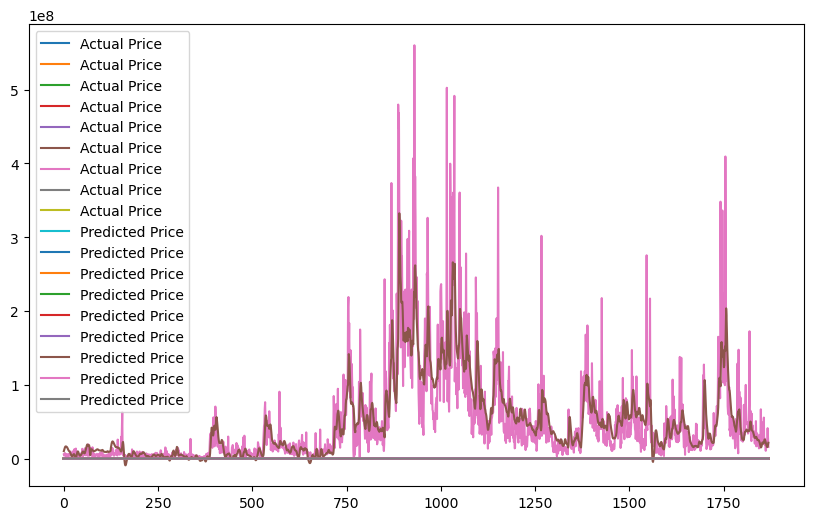

In [35]:
# import matplotlib.pyplot as plt

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.legend()
plt.title(f'{nica} Price Prediction')
plt.grid(True, linestyle='--', alpha=0.7)  # Dashed grid lines with transparency
plt.savefig(f"{nica}.png")
plt.show()


In [ ]:
# For the reversing of the data
# import pandas as pd

# # Load the CSV file
# df = pd.read_csv("cleaned_file.csv")

# # Reverse the order of rows
# df = df[::-1].reset_index(drop=True)

# # Save the modified CSV
# df.to_csv("sorted_stock_data_cleaned_nica.csv", index=False)
